<a href="https://colab.research.google.com/github/deepanshulamba/Dissertation/blob/main/MA981_Code_2211688.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset A.

## Loading libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.model_selection import train_test_split

## Loading the dataset.

In [ ]:
# loading the dataset.
mydata1 = pd.read_csv('/content/Annual_Surface_Temperature_Change.csv')
mydata1.head()      # displaying first 5 rows.

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


## Preprocessing.

### removing null values.

In [ ]:
# checking the NAN values percentage.
nullpercent= 100*(len(mydata1.loc[:,mydata1.isnull().sum(axis=0)>=1 ].index) / len(mydata1.index))
print(round(nullpercent,2))

100.0


In [ ]:
# checking the NAN values percentage in each column.
checkmissper = mydata1.isnull().mean() * 100
checkmissper

ObjectId     0.000000
Country      0.000000
ISO2         0.888889
ISO3         0.000000
Indicator    0.000000
               ...   
F2018        5.333333
F2019        5.333333
F2020        5.777778
F2021        5.333333
F2022        5.333333
Length: 72, dtype: float64

In [ ]:
# checking the no. of NAN values in each column.
checkmissing = mydata1.isnull().sum()
checkmissing

ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
F2018        12
F2019        12
F2020        13
F2021        12
F2022        12
Length: 72, dtype: int64

In [ ]:
mydata1.fillna(method='ffill', inplace=True)

In [ ]:
# verifying the NAN values again after dealing them.
checkmissper1 = mydata1.isnull().mean() * 100
checkmissper1

ObjectId     0.0
Country      0.0
ISO2         0.0
ISO3         0.0
Indicator    0.0
            ... 
F2018        0.0
F2019        0.0
F2020        0.0
F2021        0.0
F2022        0.0
Length: 72, dtype: float64

In [ ]:
checkmissing1 = mydata1.isnull().sum()
checkmissing1

ObjectId     0
Country      0
ISO2         0
ISO3         0
Indicator    0
            ..
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
Length: 72, dtype: int64

In [ ]:
mydata1.describe()   # statistical summary.

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,113.000000,0.158716,-0.007351,0.010364,-0.085533,-0.246511,0.113751,-0.111236,-0.200329,0.159236,...,0.930427,1.107436,1.265356,1.438942,1.281791,1.300156,1.437204,1.534809,1.343391,1.370640
std,65.096083,0.400430,0.342708,0.390857,0.307446,0.281377,0.374035,0.341341,0.276425,0.311490,...,0.318320,0.561045,0.471930,0.407498,0.393403,0.593410,0.474385,0.638690,0.487526,0.664228
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.101000,-0.164000,-0.203000,-0.246000,-0.406000,-0.057000,-0.269000,-0.366000,-0.009000,...,0.749000,0.744000,1.024000,1.147000,1.032000,0.878000,1.161000,1.134000,1.020000,0.875000
50%,113.000000,0.062000,-0.056000,0.037000,-0.075000,-0.228000,0.097000,-0.138000,-0.187000,0.197000,...,0.899000,0.986000,1.215000,1.446000,1.276000,1.125000,1.408000,1.455000,1.339000,1.311000
75%,169.000000,0.274000,0.126000,0.234000,0.117000,-0.090000,0.288000,0.019000,-0.066000,0.346000,...,1.183000,1.322000,1.516000,1.698000,1.523000,1.737000,1.698000,1.783000,1.624000,1.906000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


### Taking data of a particular country ( UK ).

In [ ]:
# taking UK data.
uk_count = mydata1[mydata1['Country'] == 'United Kingdom']
uk_col = uk_count.columns.tolist()
# deleting irrelevant columns.
uk_columns_to_drop = [col for col in uk_col if not col.startswith('F')]
uk_yearly_data = uk_count.drop(columns=uk_columns_to_drop)
# changing the data, to make years as rows.
uk_yearly_data = uk_yearly_data.melt(var_name='Year', value_name='UK Temperature_Change')
uk_yearly_data['Year'] = uk_yearly_data['Year'].str.replace('F', '').astype(int)  # Convert year to integer
uk_yearly_data = uk_yearly_data.sort_values(by='Year').reset_index(drop=True)
uk_yearly_data.head()   # first 5 rows of data.

,Year,UK Temperature_Change
0,1961,0.491
1,1962,-0.734
2,1963,-0.868
3,1964,0.025
4,1965,-0.575


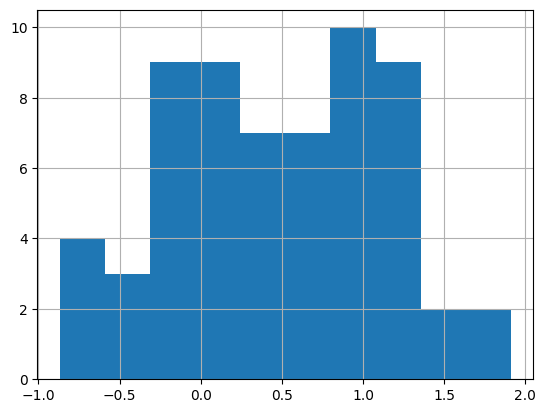

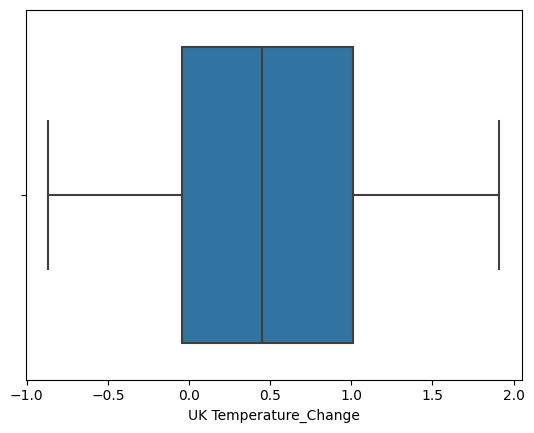

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
uk_yearly_data['UK Temperature_Change'].hist()
plt.show()

# Box plot
sns.boxplot(x=uk_yearly_data['UK Temperature_Change'])
plt.show()

# and so on for other types of plots


### plotting graph for UK data.

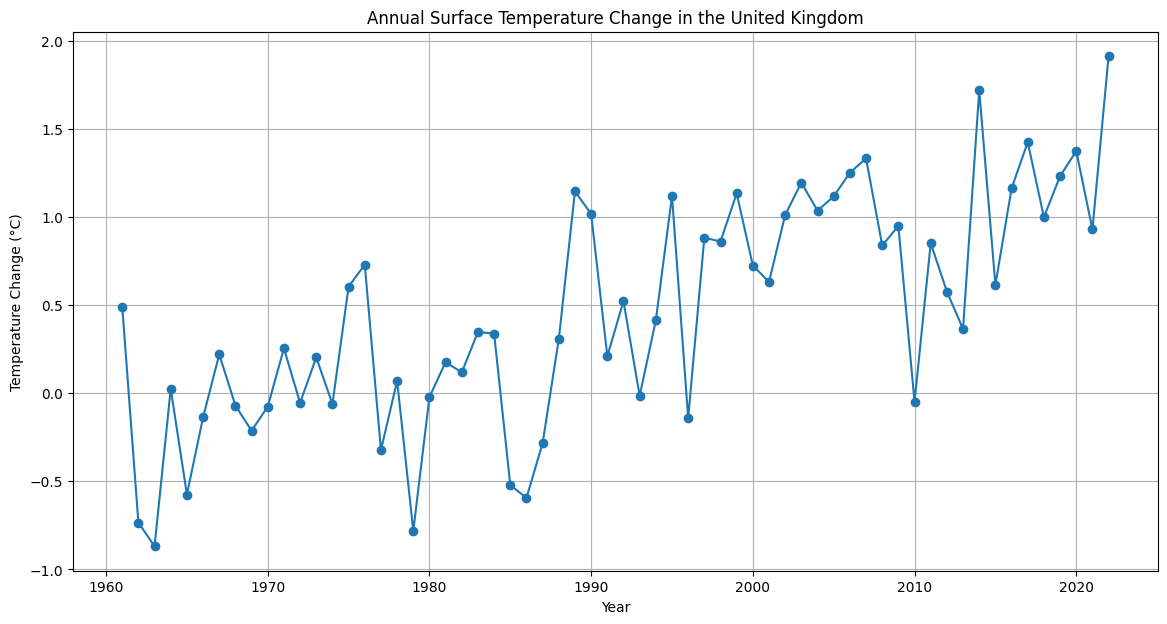

count    62.000000
mean      0.465952
std       0.648705
min      -0.868000
25%      -0.043000
50%       0.452000
75%       1.007750
max       1.911000
Name: UK Temperature_Change, dtype: float64

In [ ]:
# displaying the change in temp of the UK.
plt.figure(figsize=(14, 7))
plt.plot(uk_yearly_data['Year'], uk_yearly_data['UK Temperature_Change'], marker='o')
plt.title('Annual Surface Temperature Change in the United Kingdom')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()
uk_yearly_data['UK Temperature_Change'].describe()   # Statistical summary

## Preparation for ARIMA model.

### checking the seasonality.

<Figure size 640x480 with 0 Axes>

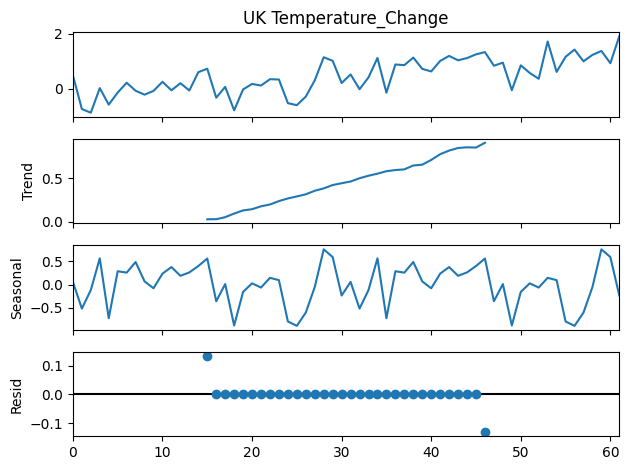

In [ ]:
result = seasonal_decompose(uk_yearly_data['UK Temperature_Change'], model='additive', period=31)
fig = plt.figure()
fig = result.plot()

### Performing ADF function to check stationarity.

In [ ]:
# applying ADF test.
myadf_test = adfuller(uk_yearly_data['UK Temperature_Change'])
adf_output = pd.Series(myadf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in myadf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value
adf_output

Test Statistic                 -0.586290
p-value                         0.874050
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64

### Doing differencing to make data stationary.

In [ ]:
# adjusting the year with differenced data.
uk_yearly_data['Temperature_Change_Diff'] = uk_yearly_data['UK Temperature_Change'].diff()
uk_yearly_data_diff = uk_yearly_data.dropna()  # deleting NAN values after differencing

# Applying ADF test again, on differened data.
adf_test_diff = adfuller(uk_yearly_data_diff['Temperature_Change_Diff'])
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff['Critical Value (%s)' % key] = value
adf_output_diff

Test Statistic                 -2.913890
p-value                         0.043756
#Lags Used                      8.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64

### plotting the graph after differencing.

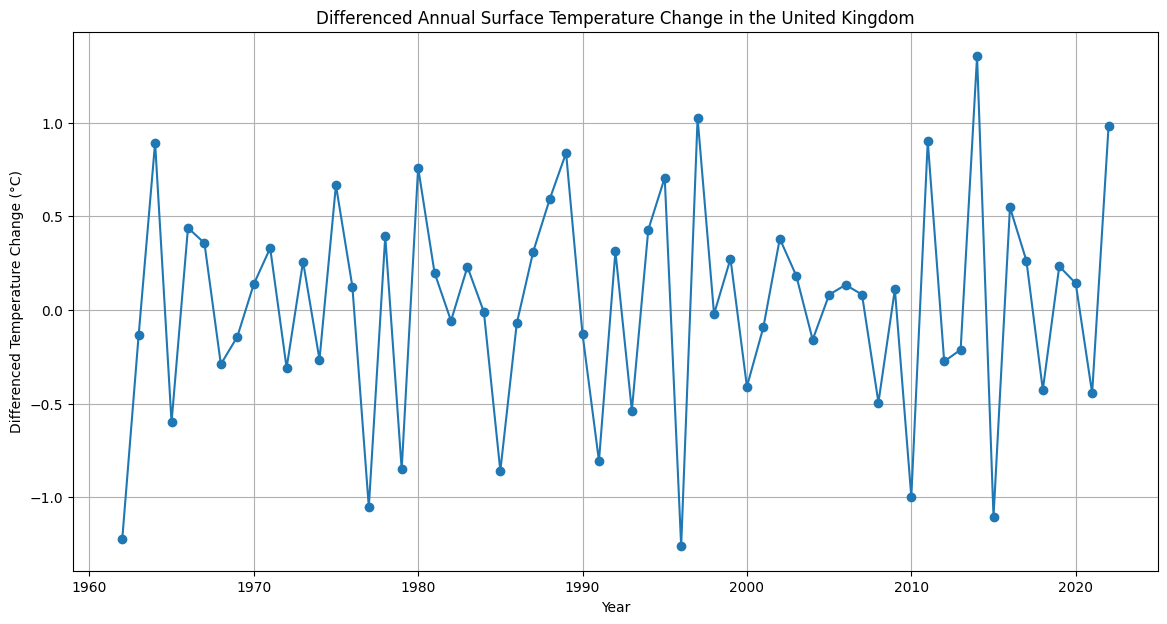

In [ ]:
# Temperature change plot.
plt.figure(figsize=(14, 7))
plt.plot(uk_yearly_data_diff['Year'], uk_yearly_data_diff['Temperature_Change_Diff'], marker='o')
plt.title('Differenced Annual Surface Temperature Change in the United Kingdom')
plt.xlabel('Year')
plt.ylabel('Differenced Temperature Change (°C)')
plt.grid(True)
plt.show()

### ACF & PACF plot after differencing.

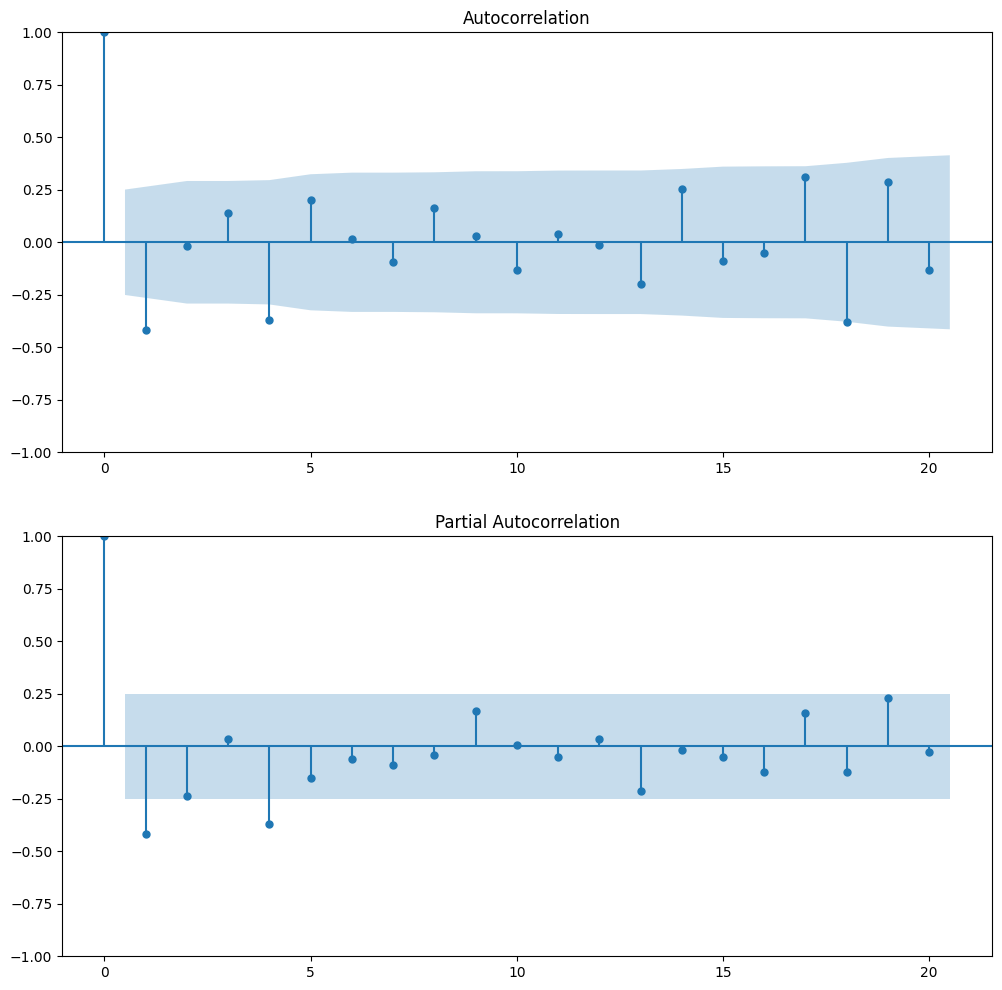

In [ ]:
# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
plot_acf(uk_yearly_data_diff['Temperature_Change_Diff'], lags=20, ax=ax1)
plot_pacf(uk_yearly_data_diff['Temperature_Change_Diff'], lags=20, ax=ax2)
plt.show()

### Fitting arima model after differencing.

In [ ]:
# Define the size of the test set
test_size = int(len(uk_yearly_data['UK Temperature_Change']) * 0.2)  # 20% of the data

# Splitting of data into train and test.
train, test = uk_yearly_data['UK Temperature_Change'][:-test_size], uk_yearly_data['UK Temperature_Change'][-test_size:]

# model fit on train data.
model = ARIMA(train, order=(2, 1, 2))#(2, 1, 2))
model_fit = model.fit()

# forecasting on test data
forecast = model_fit.forecast(steps=test_size)

# evaluating MSE between test & forecast.
error = mean_squared_error(test, forecast)

# forecast & actual data comparison with output.
comparison_df = pd.DataFrame({'Actual': test, 'Forecast': forecast})

# Outputs (acutal, forecast values & mse, )
comparison_df, error

(    Actual  Forecast
 50   0.851  0.676153
 51   0.576  0.967235
 52   0.364  0.997313
 53   1.718  0.926285
 54   0.614  0.847821
 55   1.161  0.796919
 56   1.424  0.775009
 57   0.998  0.771457
 58   1.231  0.775567
 59   1.373  0.780729
 60   0.929  0.784271
 61   1.911  0.785898,
 0.309689821650389)

### Model summary.

In [ ]:
print(model_fit.summary())   # statistical result of model.

                                 SARIMAX Results                                 
Dep. Variable:     UK Temperature_Change   No. Observations:                   50
Model:                    ARIMA(2, 1, 2)   Log Likelihood                 -32.733
Date:                   Fri, 24 Nov 2023   AIC                             75.465
Time:                           02:08:38   BIC                             84.924
Sample:                                0   HQIC                            79.054
                                    - 50                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9594      0.670      1.431      0.152      -0.354       2.273
ar.L2         -0.3431      0.222     -1.543      0.123      -0.779       0.093
ma.L1         -1.5547      0

### Forecasting.

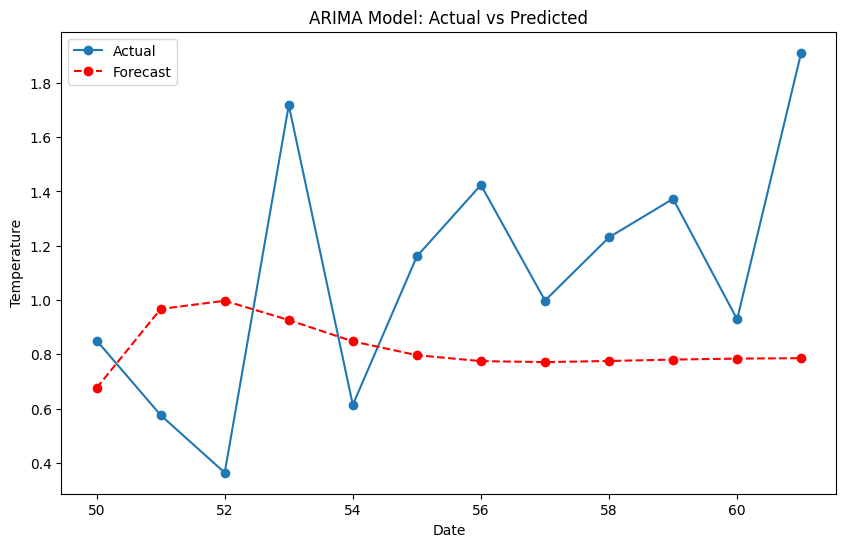

In [ ]:
# Plotting the results.
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()

### Evaluation result.

In [ ]:
mse = mean_squared_error(test, forecast)      # evaluating error score.
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mse, mae, rmse

(0.309689821650389, 0.4818401386937909, 0.5564978181901425)

### Checking residuals.

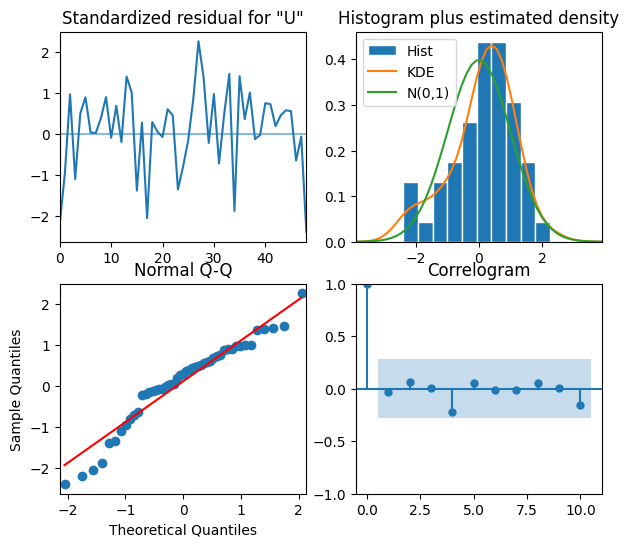

In [ ]:
model_fit.plot_diagnostics(figsize=(7,6))   # diagnostic plot.
plt.show()

### hyper parameters tuning.

In [ ]:
# assigning parameters range.
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0, 1, 2, 3, 4, 5]
q_values = [0, 1, 2, 3, 4, 5]
best_mse = float('inf')
best_order = None

# grid search for getting best parameters.
for p, d, q in itertools.product(p_values, d_values, q_values):
    model = ARIMA(train, order=(p, d, q))
    model_fit1 = model.fit()
    forecast = model_fit1.forecast(steps=test_size)
    mse = mean_squared_error(test, forecast)
    if mse < best_mse:
        best_mse = mse
        best_order = (p, d, q)

# model fit with tuned parameters.
best_model = ARIMA(train, order=best_order)
best_model_fit = best_model.fit()

# Forecast temperatures
best_forecast = best_model_fit.forecast(steps=test_size)

# forecast & actual data output
best_comparison_df = pd.DataFrame({'Actual': test, 'Forecast': best_forecast})

# Output(beset, actual & forecast values, mse score)
best_order, best_comparison_df, best_mse

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning

((5, 2, 5),
     Actual  Forecast
 50   0.851  0.618277
 51   0.576  1.035164
 52   0.364  0.879809
 53   1.718  1.307900
 54   0.614  0.981302
 55   1.161  1.040202
 56   1.424  1.245760
 57   0.998  1.065914
 58   1.231  1.128341
 59   1.373  1.356971
 60   0.929  1.052842
 61   1.911  1.336427,
 0.10344877347962227)

### Model summary.

In [ ]:
print(best_model_fit.summary())  # statistical result after hyperparameters.

                                 SARIMAX Results                                 
Dep. Variable:     UK Temperature_Change   No. Observations:                   50
Model:                    ARIMA(5, 2, 5)   Log Likelihood                 -30.636
Date:                   Fri, 24 Nov 2023   AIC                             83.273
Time:                           02:10:28   BIC                            103.856
Sample:                                0   HQIC                            91.051
                                    - 50                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6534      0.504     -3.278      0.001      -2.642      -0.665
ar.L2         -1.1871      0.638     -1.860      0.063      -2.438       0.064
ar.L3         -0.2645      0

### Plotting the result.

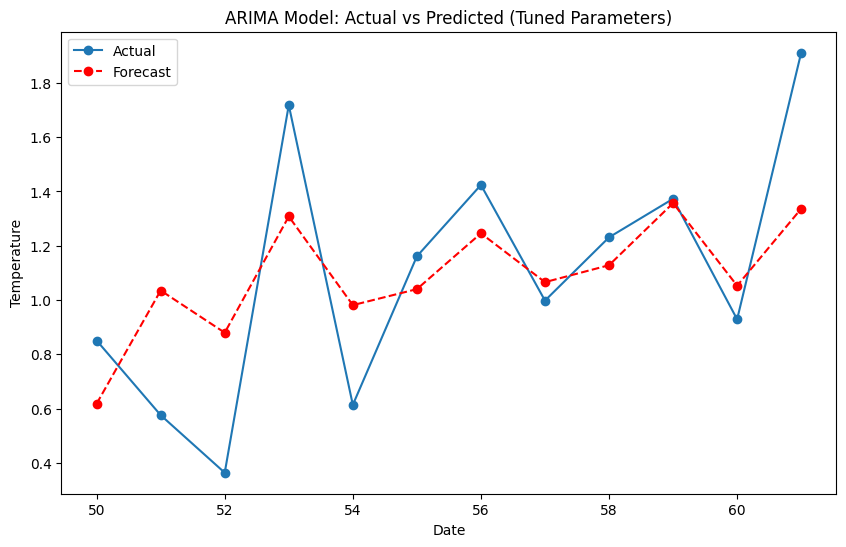

In [ ]:
# Plotting actual values and predictions after hyperparameters.
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, best_forecast, label='Forecast', color='red', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA Model: Actual vs Predicted (Tuned Parameters)')
plt.legend()
plt.show()

### Evaluation result.

In [ ]:
mse = mean_squared_error(test, best_forecast)    # evaluation score after hyperparameters.
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, best_forecast)
mse, mae, rmse

(0.10344877347962227, 0.2640962788673055, 0.32163453402833203)

### Residuals check.

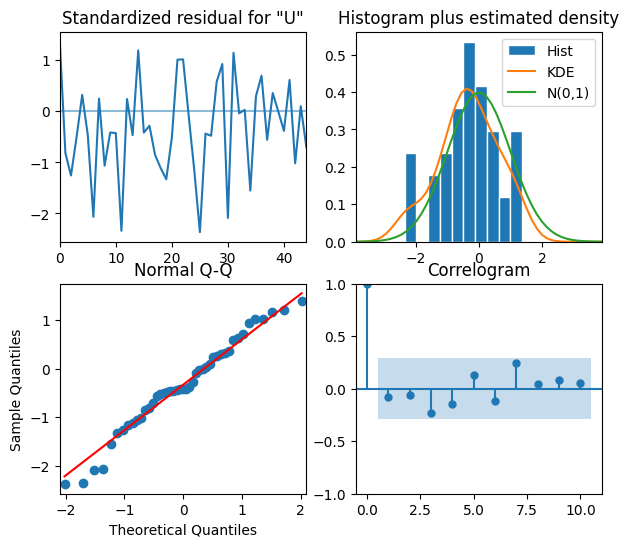

In [ ]:
model_fit1.plot_diagnostics(figsize=(7,6))   # diagnostics plot
plt.show()

### Future Forecasting.

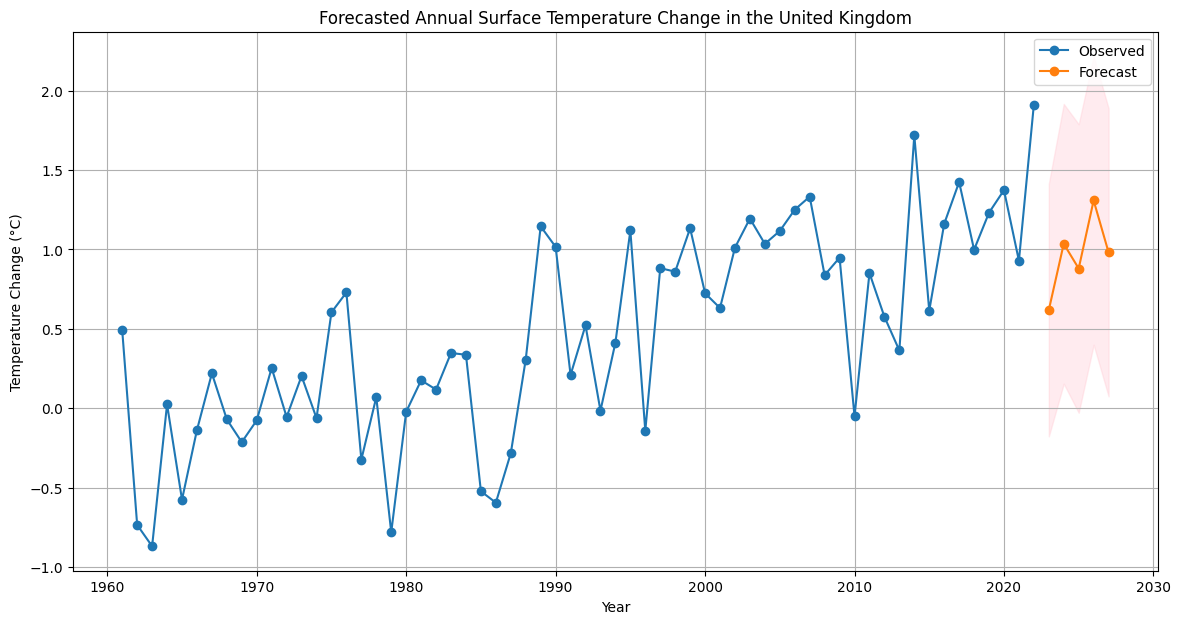

In [ ]:
# Forecast the next 5 years
forecast_years = 5
forecast_result = best_model_fit.get_forecast(steps=forecast_years)
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int(alpha=0.05)  # 95% conf

# Plot the data and the forecast
plt.figure(figsize=(14,7))
plt.plot(uk_yearly_data['Year'], uk_yearly_data['UK Temperature_Change'], label='Observed', marker='o')
forecast_years_array = list(range(uk_yearly_data['Year'].iloc[-1] + 1, uk_yearly_data['Year'].iloc[-1] + forecast_years + 1))
plt.plot(forecast_years_array, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_years_array,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Forecasted Annual Surface Temperature Change in the United Kingdom')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Visualizations.

### Box plot: Temperature Change by Decade in the United Kingdom

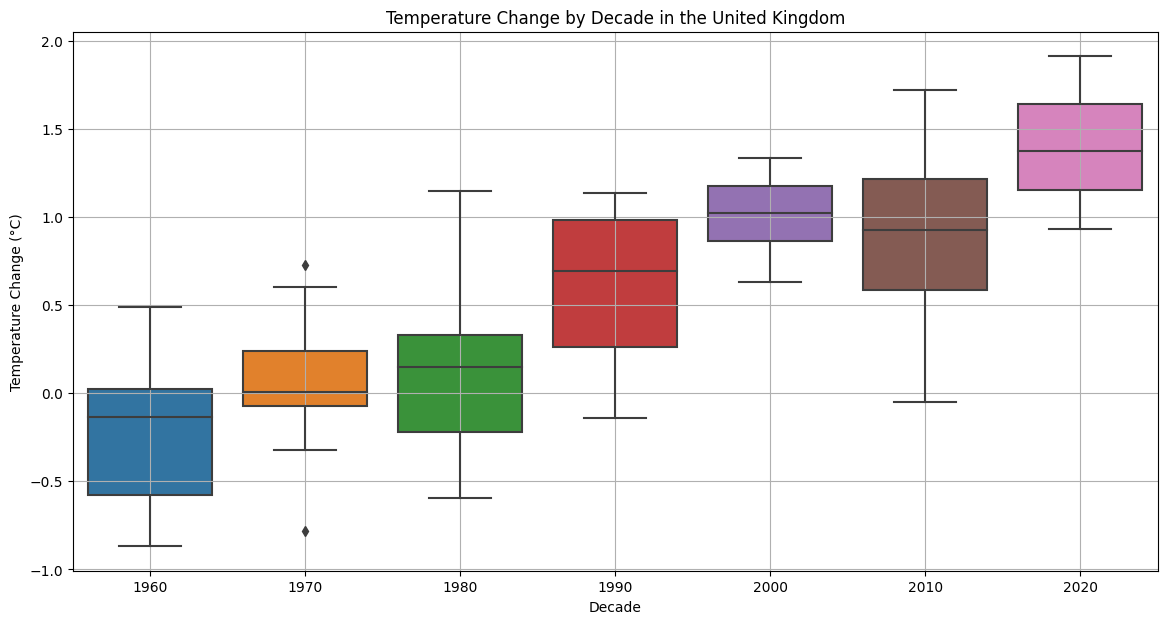

In [ ]:
# creating mew column('Decade').
uk_yearly_data['Decade'] = (uk_yearly_data['Year'] // 10) * 10

# Plotting the boxplots.
plt.figure(figsize=(14, 7))
sns.boxplot(x='Decade', y='UK Temperature_Change', data=uk_yearly_data)
plt.title('Temperature Change by Decade in the United Kingdom')
plt.xlabel('Decade')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()

### How Is The Global Average Temperature Change From 1961-2022?

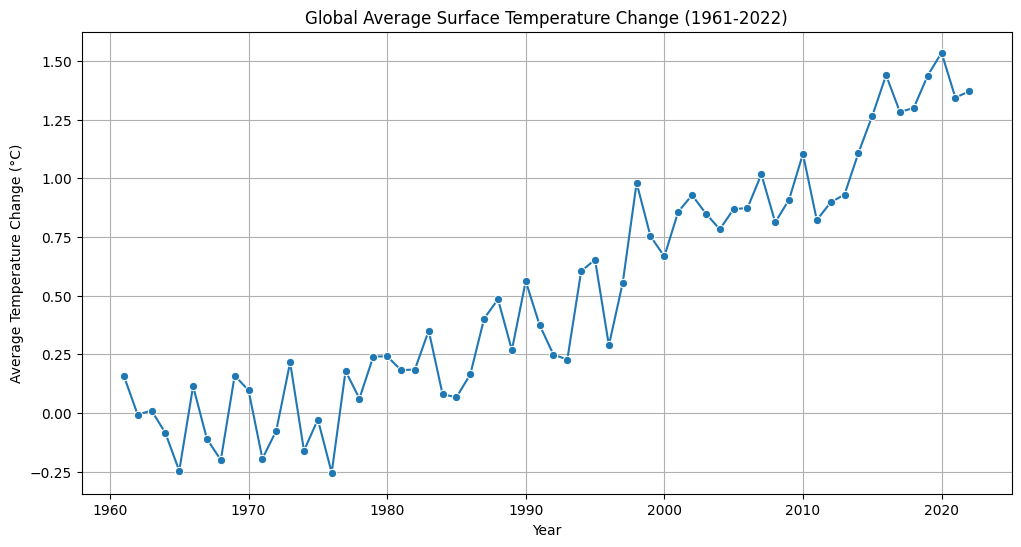

In [ ]:
# Filtering the columns for visualization.
relevant_columns = ['Country', 'ISO2', 'ISO3'] + [col for col in mydata1.columns if col.startswith('F')]
mydata1_filtered = mydata1[relevant_columns]
mydata1_long = pd.melt(mydata1_filtered, id_vars=['Country', 'ISO2', 'ISO3'],
                                var_name='Year', value_name='TemperatureChange')

# Converting 'Year' from 'FYYYY' to 'YYYY' style.
mydata1_long['Year'] = mydata1_long['Year'].str[1:].astype(int)

mydata1_long.head()   # showing first 5 rows of new data.

# calculating average temperature change of each year.
global_avg_temp_change = mydata1_long.groupby('Year')['TemperatureChange'].mean().reset_index()

# Plotting the result.
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_avg_temp_change, x='Year', y='TemperatureChange', marker = 'o')
plt.title('Global Average Surface Temperature Change (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.grid(True)
plt.show()

### What variations have there been in surface temperature throughout the decades?

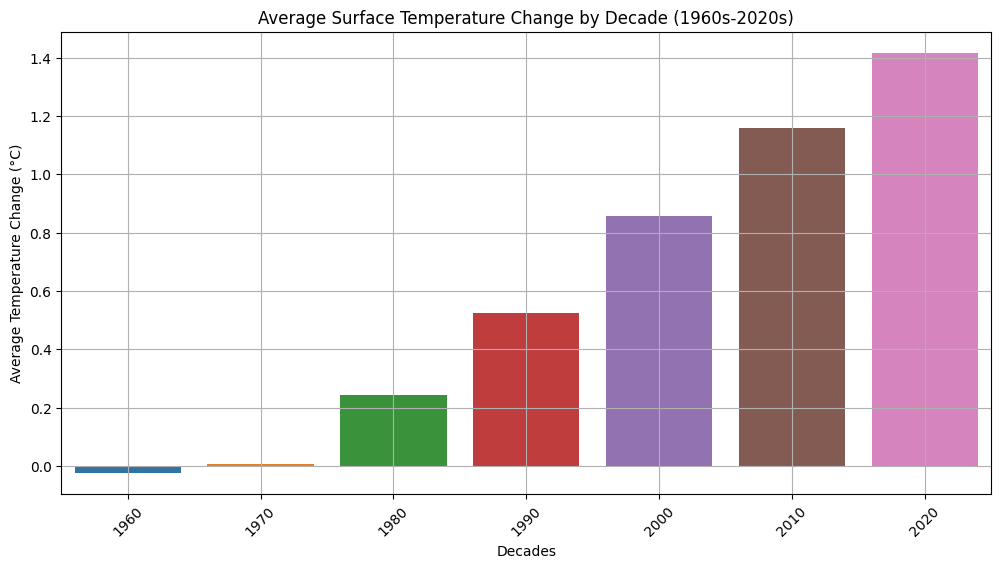

,Decade,TemperatureChange
0,1960,-0.023210
1,1970,0.007704
2,1980,0.242478
3,1990,0.524556
4,2000,0.856360
5,2010,1.158399
6,2020,1.416280


In [ ]:
# grouping data by decade, calculating avg change in temp for each decade.
mydata1_long['Decade'] = (mydata1_long['Year'] // 10) * 10
decade_avg_temp_change = mydata1_long.groupby('Decade')['TemperatureChange'].mean().reset_index()

# Plotting the results.
plt.figure(figsize=(12, 6))
sns.barplot(data=decade_avg_temp_change, x='Decade', y='TemperatureChange')
plt.title('Average Surface Temperature Change by Decade (1960s-2020s)')
plt.xlabel('Decades')
plt.ylabel('Average Temperature Change (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
decade_avg_temp_change

### Are there any noticeable patterns or anomalies in the temperature changes over the years?

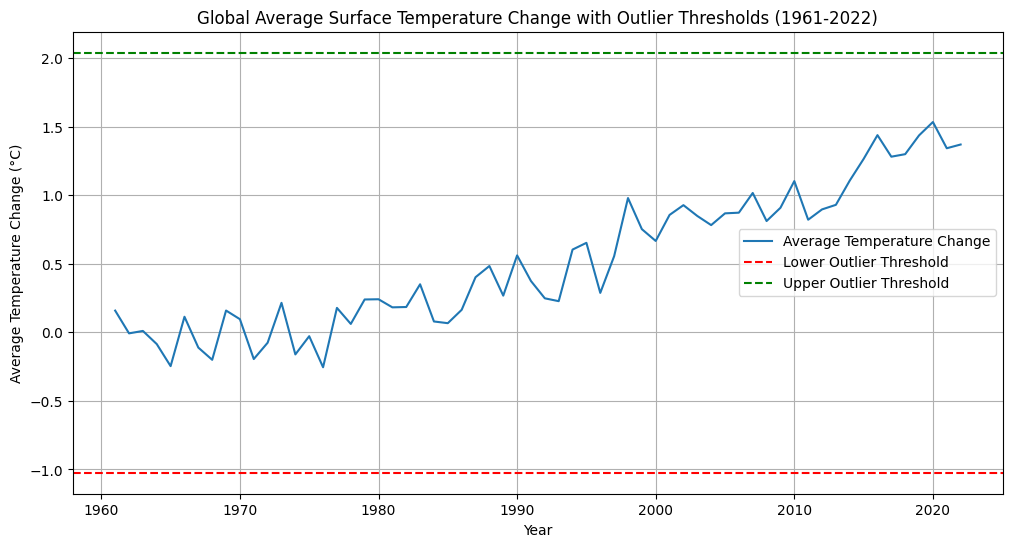

[]

In [ ]:
# checking outliers using interquartile range
Q1 = global_avg_temp_change['TemperatureChange'].quantile(0.25)
Q3 = global_avg_temp_change['TemperatureChange'].quantile(0.75)
IQR = Q3 - Q1
outlier_thresholds = [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

# showing outliers in the plot.
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_avg_temp_change, x='Year', y='TemperatureChange', label='Average Temperature Change')
plt.axhline(outlier_thresholds[0], color='red', linestyle='--', label='Lower Outlier Threshold')
plt.axhline(outlier_thresholds[1], color='green', linestyle='--', label='Upper Outlier Threshold')
plt.title('Global Average Surface Temperature Change with Outlier Thresholds (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()

# recognizing years with outliers
outliers = global_avg_temp_change[
    (global_avg_temp_change['TemperatureChange'] < outlier_thresholds[0]) |
    (global_avg_temp_change['TemperatureChange'] > outlier_thresholds[1])
]
outlier_years = outliers['Year'].tolist()
outlier_years

### Do temperature trends differ between developed and developing nations?

In [ ]:
# file_path = '/content/Annual_Surface_Temperature_Change.csv'
# temperature_data = pd.read_csv(file_path)
# Checking for NAN values
temperature_data = mydata1
#missing_values = temperature_data.isnull().sum()

# removing irrelevant columns
reduced_data = temperature_data.drop(columns=['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'])

# Transposing the yearly data, index setting to country
transposed_data = reduced_data.set_index('Country').transpose()

# Displaying the transformed data and missing values information
transposed_data.head()#, missing_values.sort_values(ascending=False)

filled_data = transposed_data.fillna(transposed_data.mean())

# confirming if NAN values are filled.
missing_values_after_filling = filled_data.isnull().sum()
global_avg_temp_change = filled_data.mean(axis=1)

# Converting index to datetime for ease
filled_data.index = pd.to_datetime(filled_data.index, format='F%Y')

# resizing the data by decade, calculating the mean
# 'AS' stands for 'year start', take this to group the data by decades, begin from 1st yr of each decade.
decade_avg = filled_data.resample('10AS').mean()

# evaluating the mean
decade_avg_global = decade_avg.mean(axis=1)

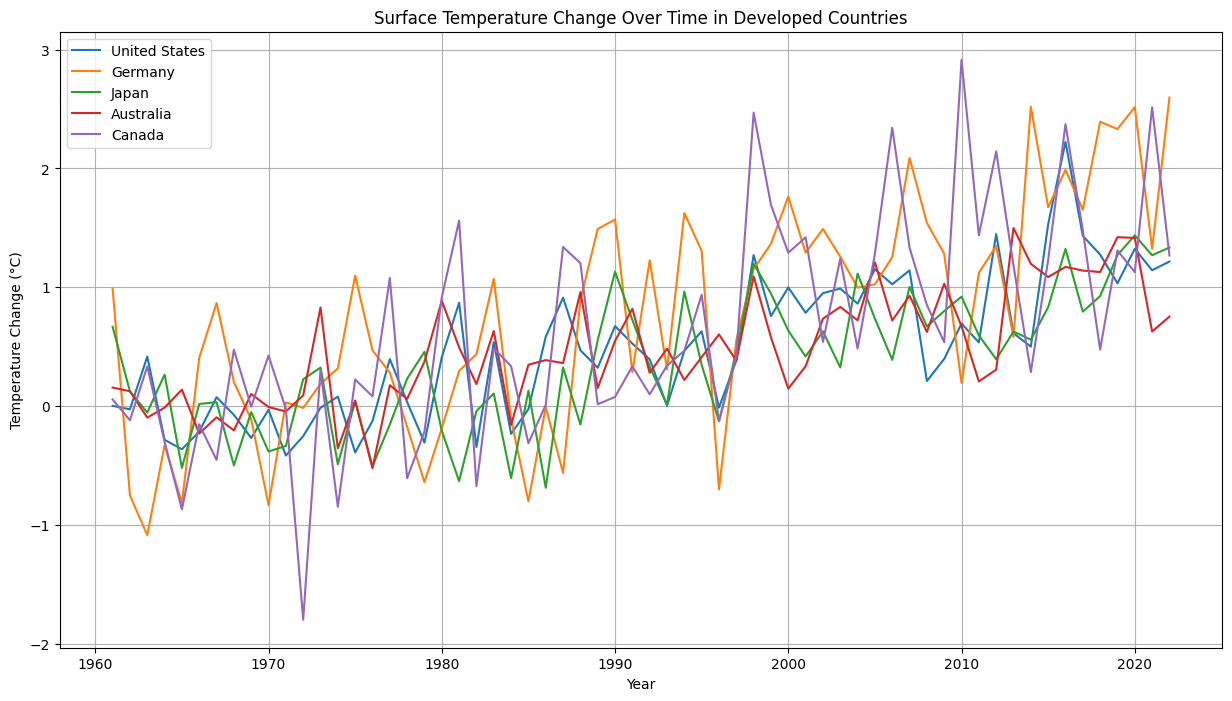

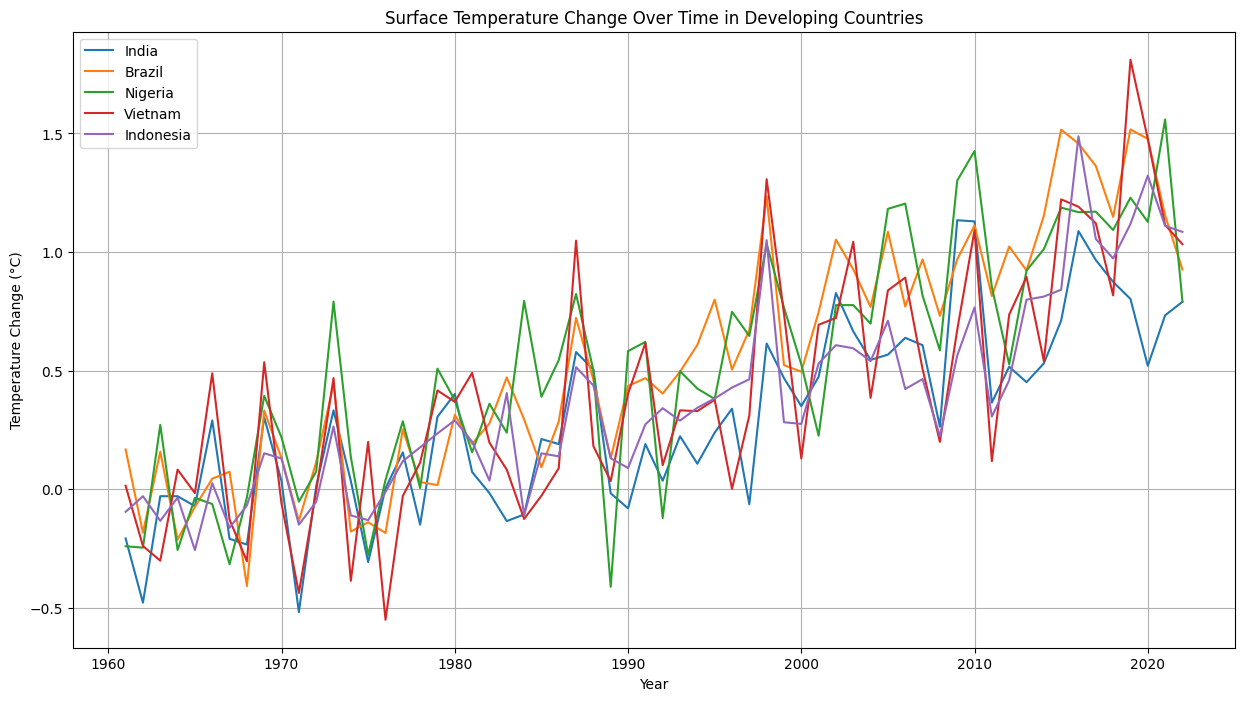

In [ ]:
# grouping the countries
developed_countries = ['United States', 'Germany', 'Japan', 'Australia', 'Canada']
developing_countries = ['India', 'Brazil', 'Nigeria', 'Vietnam', 'Indonesia']

# taking data for developed and developing countries
developed_data = filled_data[developed_countries]
developing_data = filled_data[developing_countries]

# Plotting the results for developed countries
plt.figure(figsize=(15, 8))
for country in developed_countries:
    sns.lineplot(x=developed_data.index.year, y=developed_data[country].values, label=country)

plt.title('Surface Temperature Change Over Time in Developed Countries')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the result for developing countries
plt.figure(figsize=(15, 8))
for country in developing_countries:
    sns.lineplot(x=developing_data.index.year, y=developing_data[country].values, label=country)

plt.title('Surface Temperature Change Over Time in Developing Countries')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()


### Average Annual Temperature Changes by Continent.

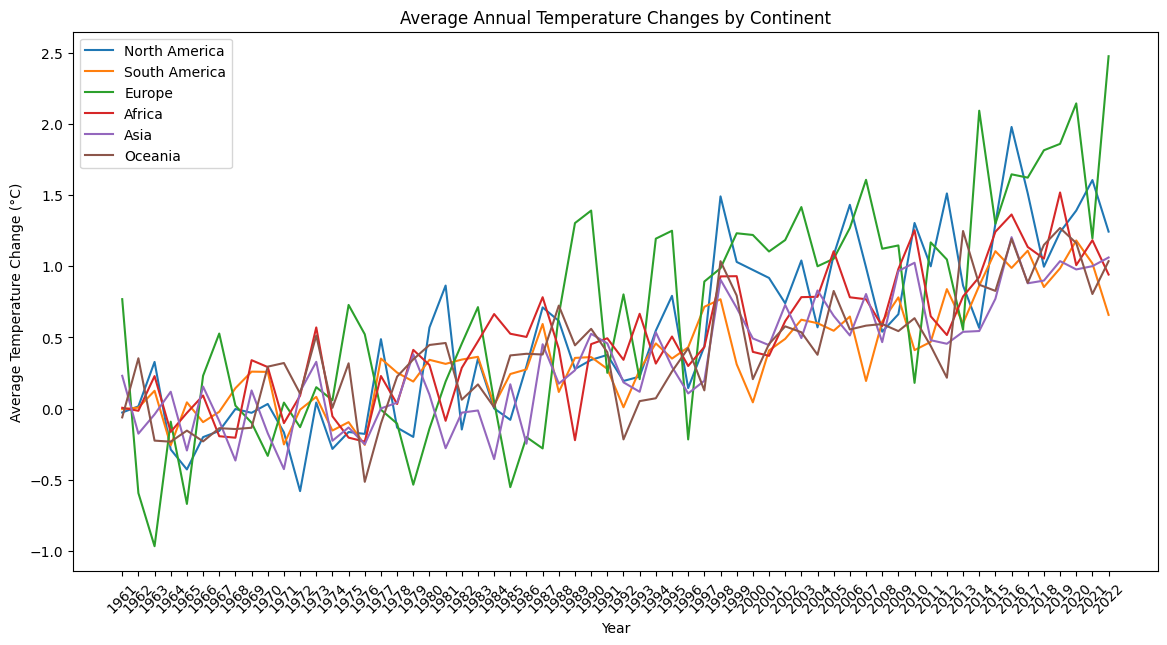

In [ ]:
temp_change_df = mydata1#pd.read_csv('/content/Annual_Surface_Temperature_Change.csv')
# getting some countries from each continent.
representative_countries = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile'],
    'Europe': ['United Kingdom', 'Germany', 'France'],
    'Africa': ['Nigeria', 'Egypt', 'South Africa'],
    'Asia': ['China', 'India', 'Japan'],
    'Oceania': ['Australia', 'New Zealand'],
    'Antarctica': []  # Antarctica is not typically included in country-based datasets
}

# setting the data based on these countries
filtered_continent_df = temp_change_df[temp_change_df['Country'].isin(sum(representative_countries.values(), []))]
# # Preparing data for a time series plot of temperature changes for each continent
# # We will average the annual temperature changes for the selected countries in each continent

# # Initializing a dictionary to store the yearly data for each continent
yearly_continent_temp_changes = {continent: [] for continent in representative_countries.keys() if representative_countries[continent]}

# Iterating over each continent and calculating the average temperature change per year
years = filtered_continent_df.columns[10:]  # Extracting year columns

for continent, countries in representative_countries.items():
    if countries:  # Skip Antarctica as it has no representative countries
        continent_data = filtered_continent_df[filtered_continent_df['Country'].isin(countries)]
        avg_yearly_temp_change = continent_data[years].mean()
        yearly_continent_temp_changes[continent] = avg_yearly_temp_change

# changing data for easy plotting
yearly_continent_temp_changes_df = pd.DataFrame(yearly_continent_temp_changes, index=years)
# Removing the 'F' from the year names, for clearer visualization
cleaned_years = [year.replace('F', '') for year in years]
yearly_continent_temp_changes_df_cleaned = yearly_continent_temp_changes_df.set_index(pd.Index(cleaned_years))

# Plotting the result
plt.figure(figsize=(14, 7))
for continent in yearly_continent_temp_changes_df_cleaned.columns:
    plt.plot(yearly_continent_temp_changes_df_cleaned.index, yearly_continent_temp_changes_df_cleaned[continent], label=continent)

plt.title('Average Annual Temperature Changes by Continent')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Dataset B.

## Loading data.

In [ ]:
# dataset loading.
data = pd.read_csv('/content/GlobalTemperatures.csv', parse_dates=['dt'], index_col='dt')
data.head()   # displaying first 5 rows.

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing.

In [ ]:
# Reloading the dataset and setting the 'dt' column as a datetime index
#data = pd.read_csv(file_path, parse_dates=['dt'], index_col='dt')

# creating 'year' and 'month' columns
data['year'] = data.index.year
data['month'] = data.index.month

# verifying the changes
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
 8   year                                       3192 non-null   int64  
 9   month                                      3192 non-null   int64  
dtypes: flo

(None,
             LandAverageTemperature  LandAverageTemperatureUncertainty  \
 dt                                                                      
 1750-01-01                   3.034                              3.574   
 1750-02-01                   3.083                              3.702   
 1750-03-01                   5.626                              3.076   
 1750-04-01                   8.490                              2.451   
 1750-05-01                  11.573                              2.072   
 
             LandMaxTemperature  LandMaxTemperatureUncertainty  \
 dt                                                              
 1750-01-01                 NaN                            NaN   
 1750-02-01                 NaN                            NaN   
 1750-03-01                 NaN                            NaN   
 1750-04-01                 NaN                            NaN   
 1750-05-01                 NaN                            NaN   
 
         

### Taking data after 1850 for better analysis.

In [ ]:
# removing data before 1850
data_post_1850 = data[data['year'] >= 1850]
data_post_1850.head()   # first 5 rows showing.
# data_post_1850.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
dt,,,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5


## Visualizations.

### 1. Trend Analysis: Temperature Over Time

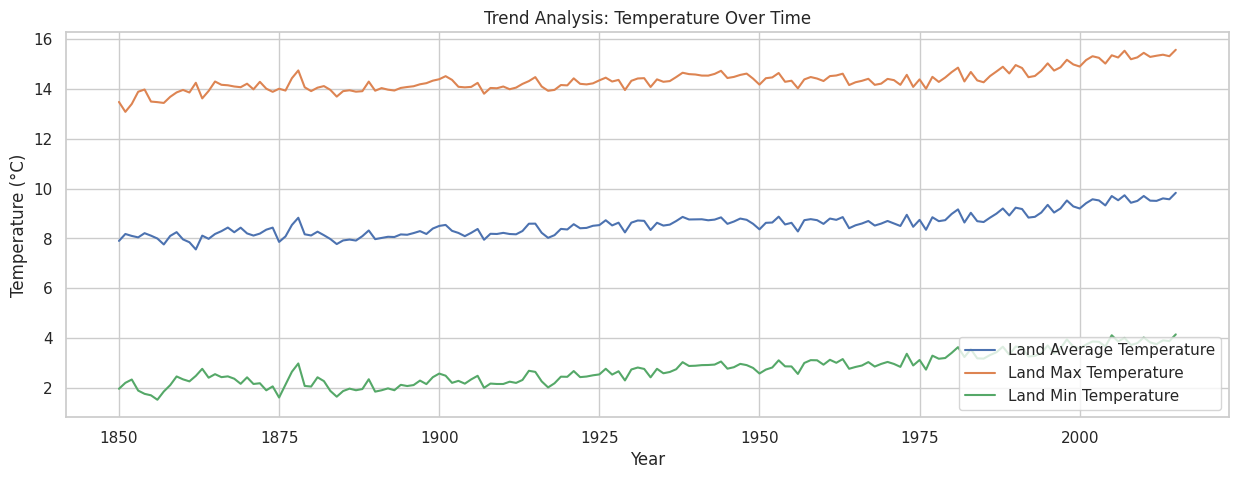

In [ ]:
# Setting the style for plot.
sns.set(style="whitegrid")

# year-by-year grouping to get annual averages
yearly_data = data_post_1850.groupby('year').mean()

# plotting the result.
plt.figure(figsize=(15, 5))
plt.plot(yearly_data.index, yearly_data['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(yearly_data.index, yearly_data['LandMaxTemperature'], label='Land Max Temperature')
plt.plot(yearly_data.index, yearly_data['LandMinTemperature'], label='Land Min Temperature')
plt.title('Trend Analysis: Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### 2. Seasonal Analysis: Monthly Average Temperature.

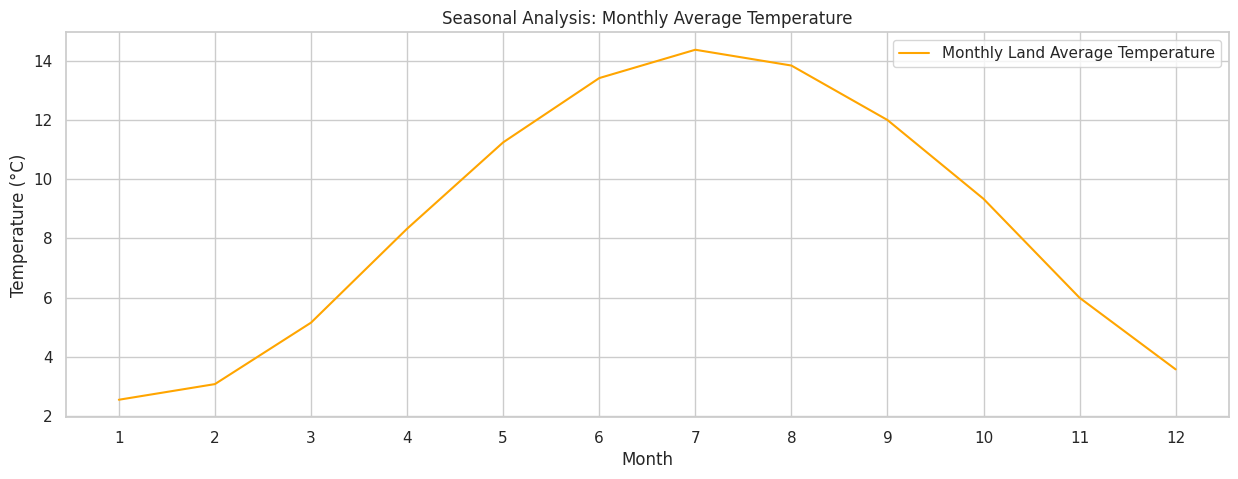

In [ ]:
# grouping by months & plotting the result.
monthly_avg = data_post_1850.groupby('month').mean()
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg.index, monthly_avg['LandAverageTemperature'], label='Monthly Land Average Temperature', color='orange')
plt.title('Seasonal Analysis: Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

### 3. Uncertainty Analysis: Temperature Uncertainty Over Time.

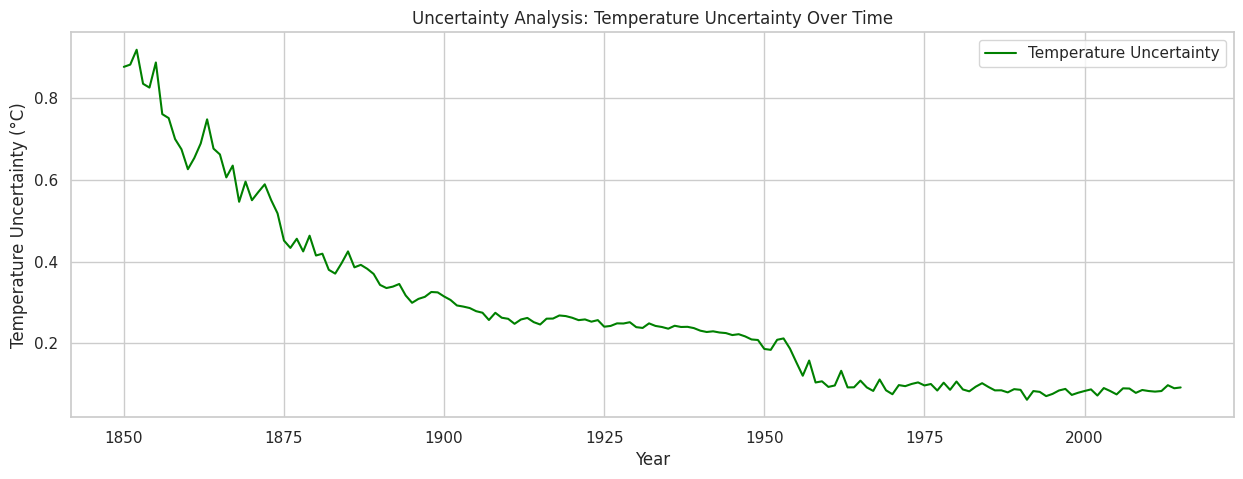

In [ ]:
# plotting the result for uncertainties.
plt.figure(figsize=(15, 5))
plt.plot(yearly_data.index, yearly_data['LandAverageTemperatureUncertainty'], label='Temperature Uncertainty', color='green')
plt.title('Uncertainty Analysis: Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Uncertainty (°C)')
plt.legend()
plt.show()

### 4. Comparative Analysis: Land vs Land and Ocean Temperature Trends.

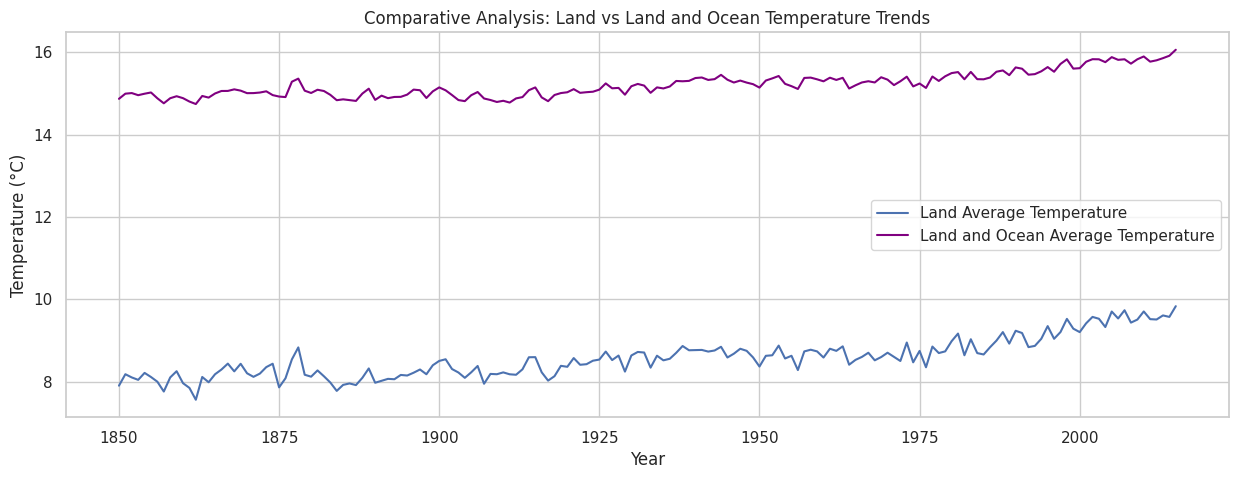

In [ ]:
# plotting the anlaysis result of both Land vs Land and Ocean Temperature Trends
plt.figure(figsize=(15, 5))
plt.plot(yearly_data.index, yearly_data['LandAverageTemperature'], label='Land Average Temperature')
plt.plot(yearly_data.index, yearly_data['LandAndOceanAverageTemperature'], label='Land and Ocean Average Temperature', color='purple')
plt.title('Comparative Analysis: Land vs Land and Ocean Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### 5. Correlation Analysis: Temperature Data.

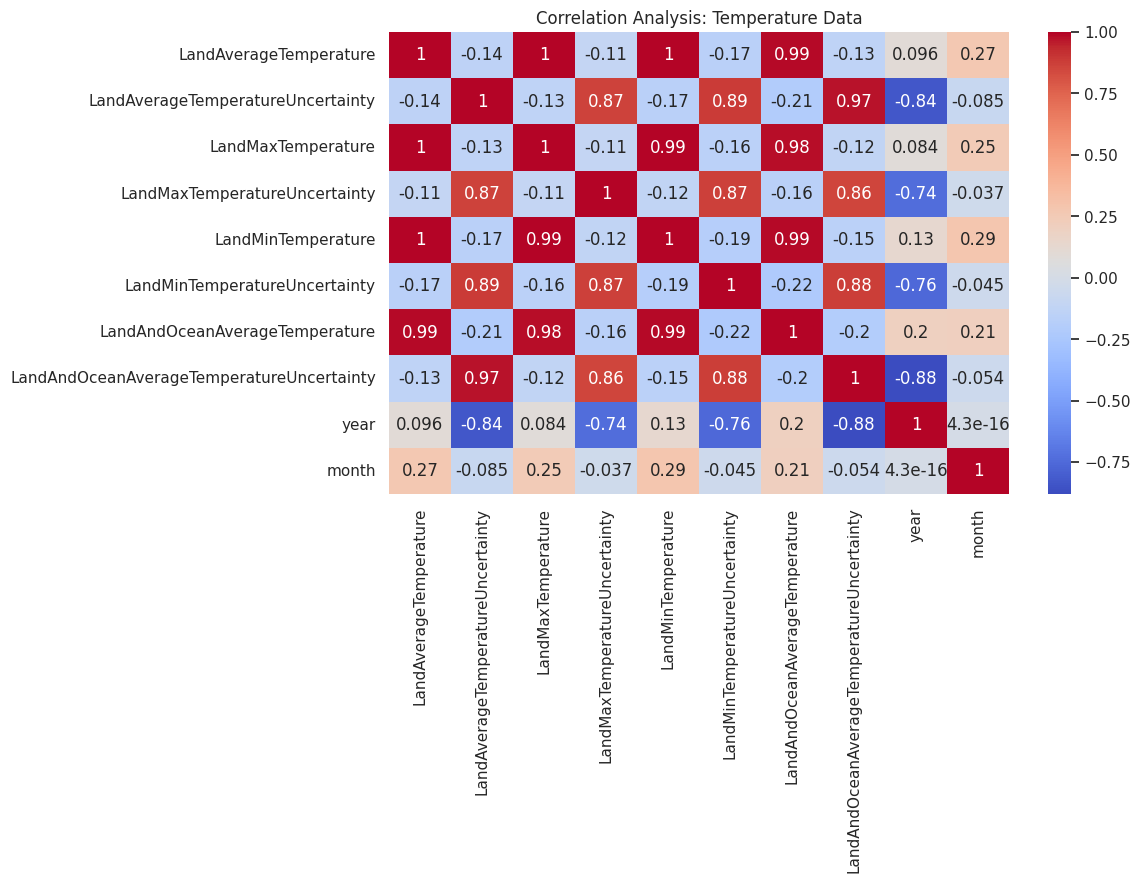

In [ ]:
# # plotting Heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(data_post_1850.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis: Temperature Data')
plt.show()

### 6. Yearly Temperature Difference (Max - Min).

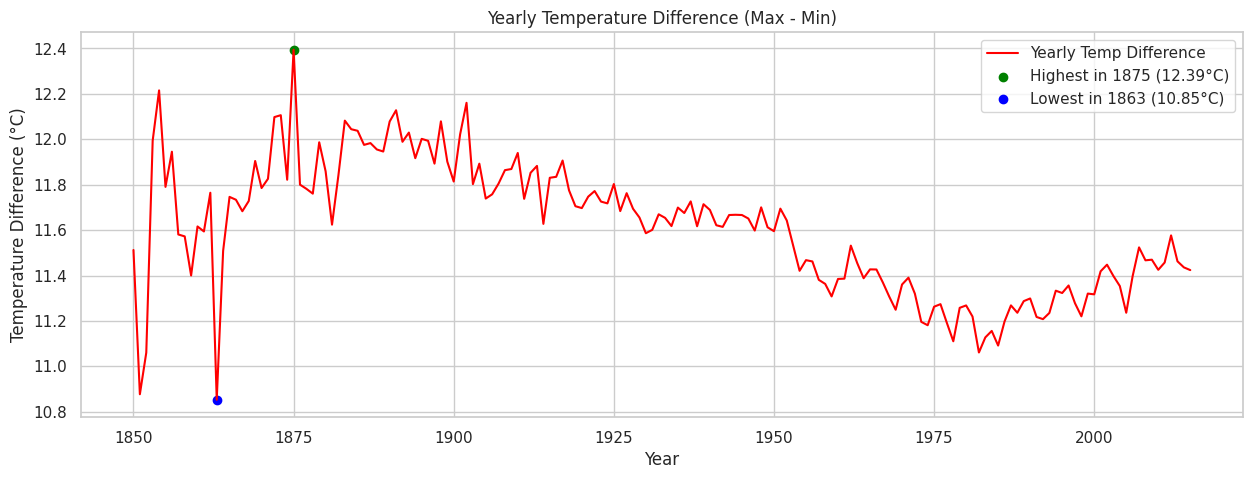

((1875, 12.394250000000001), (1863, 10.852833333333333))

In [ ]:
# evaluating the temp difference(max & min) for every year.
yearly_data['TempDifference'] = yearly_data['LandMaxTemperature'] - yearly_data['LandMinTemperature']

# determing year, w/ highest & lowest temp diff
max_temp_diff_year = yearly_data['TempDifference'].idxmax()
min_temp_diff_year = yearly_data['TempDifference'].idxmin()
max_temp_diff_value = yearly_data['TempDifference'].max()
min_temp_diff_value = yearly_data['TempDifference'].min()

# Plotting the result.
plt.figure(figsize=(15, 5))
plt.plot(yearly_data.index, yearly_data['TempDifference'], label='Yearly Temp Difference', color='red')
plt.title('Yearly Temperature Difference (Max - Min)')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')
plt.scatter(max_temp_diff_year, max_temp_diff_value, color='green', label=f'Highest in {max_temp_diff_year} ({max_temp_diff_value:.2f}°C)')
plt.scatter(min_temp_diff_year, min_temp_diff_value, color='blue', label=f'Lowest in {min_temp_diff_year} ({min_temp_diff_value:.2f}°C)')
plt.legend()
plt.show()

(max_temp_diff_year, max_temp_diff_value), (min_temp_diff_year, min_temp_diff_value)

### 7. Change in Temperature by Decades.

<ipython-input-45-56c3c2d4cd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_post_1850['decade'] = (data_post_1850['year'] // 10) * 10


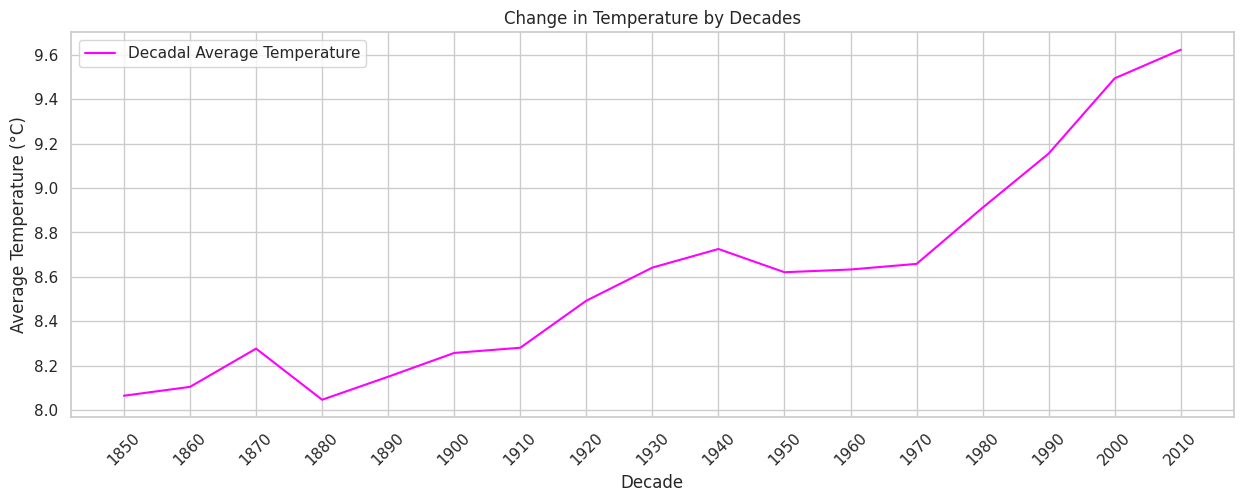

In [ ]:
# Creating decade column.
data_post_1850['decade'] = (data_post_1850['year'] // 10) * 10

# Grouping data by decade
decadal_data = data_post_1850.groupby('decade').mean()

# Plotting the result.
plt.figure(figsize=(15, 5))
plt.plot(decadal_data.index, decadal_data['LandAverageTemperature'], label='Decadal Average Temperature', color='magenta')
plt.title('Change in Temperature by Decades')
plt.xlabel('Decade')
plt.ylabel('Average Temperature (°C)')
plt.xticks(decadal_data.index, rotation=45)  # Rotate x-ticks for better readability
plt.grid(True)
plt.legend()
plt.show()

### 8. Temperature changes vary across different seasons.

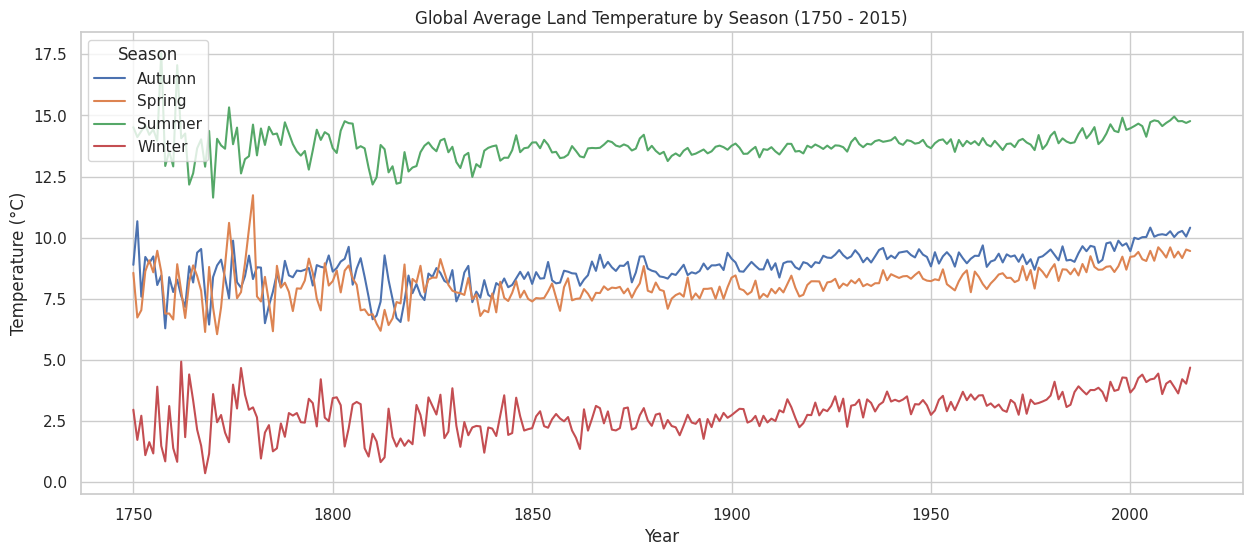

In [ ]:
# Taking year out of index, compute annual average.
yearly_avg_temp = data.groupby('year')['LandAverageTemperature'].mean().reset_index()

# Defining seasons based on months (Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'
data['Season'] = data['month'].apply(get_season)

# evaluating mean of seasonal temperature
seasonal_avg_temp = data.groupby(['year', 'Season'])['LandAverageTemperature'].mean().reset_index()

# Plotting the seasonal temperature changes
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='LandAverageTemperature', hue='Season', data=seasonal_avg_temp)
plt.title('Global Average Land Temperature by Season (1750 - 2015)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season')
plt.grid(True)
plt.show()


### Temperature changes by continent.

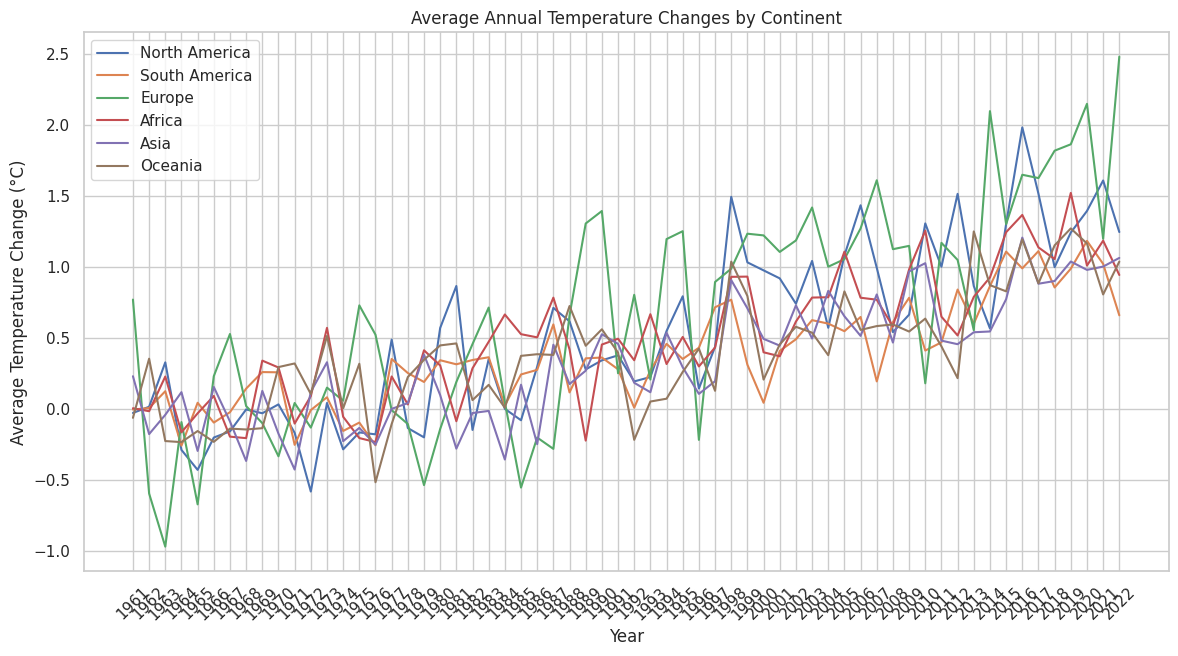

In [ ]:
# using first dataset
temp_change_df = mydata1
# taking few countries from each continent
representative_countries = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile'],
    'Europe': ['United Kingdom', 'Germany', 'France'],
    'Africa': ['Nigeria', 'Egypt', 'South Africa'],
    'Asia': ['China', 'India', 'Japan'],
    'Oceania': ['Australia', 'New Zealand'],
    'Antarctica': []  # Antarctica is not typically included in country-based datasets
}

# redefinig the data, based on these info
filtered_continent_df = temp_change_df[temp_change_df['Country'].isin(sum(representative_countries.values(), []))]

# creating a dictationary to store continent values.
yearly_continent_temp_changes = {continent: [] for continent in representative_countries.keys() if representative_countries[continent]}

# checking each continent, calculating mean
years = filtered_continent_df.columns[10:]  # Extracting year columns

for continent, countries in representative_countries.items():
    if countries:  # avoiding Antarctica, because of no country.
        continent_data = filtered_continent_df[filtered_continent_df['Country'].isin(countries)]
        avg_yearly_temp_change = continent_data[years].mean()
        yearly_continent_temp_changes[continent] = avg_yearly_temp_change

# changing dataframe for easeness.
yearly_continent_temp_changes_df = pd.DataFrame(yearly_continent_temp_changes, index=years)
# Removing the 'F' from the year names
cleaned_years = [year.replace('F', '') for year in years]
yearly_continent_temp_changes_df_cleaned = yearly_continent_temp_changes_df.set_index(pd.Index(cleaned_years))

# Plotting the result
plt.figure(figsize=(14, 7))
for continent in yearly_continent_temp_changes_df_cleaned.columns:
    plt.plot(yearly_continent_temp_changes_df_cleaned.index, yearly_continent_temp_changes_df_cleaned[continent], label=continent)

plt.title('Average Annual Temperature Changes by Continent')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Arima model preparation.

In [ ]:
temp_data = yearly_data['LandAverageTemperature'].dropna()   # taking land average data for performing the task.

### Seasonality check.

<Figure size 640x480 with 0 Axes>

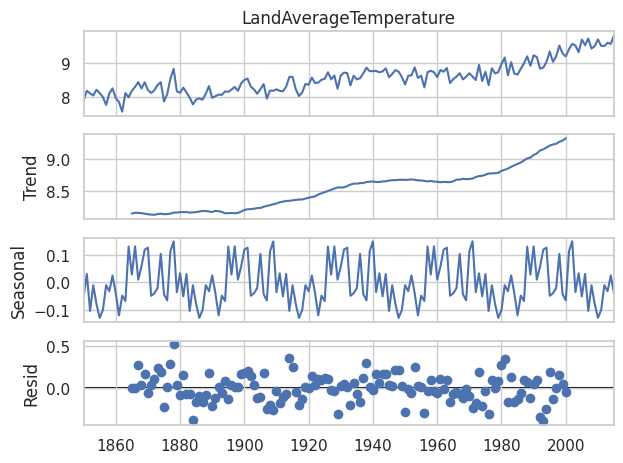

In [ ]:
result = seasonal_decompose(temp_data, model='additive', period=31)
fig = plt.figure()
fig = result.plot()

### Stationarity check.

In [ ]:
# Performing the ADF test.
adf_test = adfuller(temp_data)

# Displaying the results.
adf_test_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_test_output[f'Critical Value ({key})'] = value
adf_test_output

Test Statistic                  -0.088762
p-value                          0.950546
#Lags Used                       3.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64

### Differencing.

In [ ]:
# doing differencing, to make it stationary
temp_data_diff = temp_data.diff().dropna()

# appling ADF again on differenced data.
adf_test_diff = adfuller(temp_data_diff)

# Displaying the results
adf_test_diff_output = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_test_diff_output[f'Critical Value ({key})'] = value
adf_test_diff_output

Test Statistic                -1.353066e+01
p-value                        2.625627e-25
#Lags Used                     2.000000e+00
Number of Observations Used    1.620000e+02
Critical Value (1%)           -3.471374e+00
Critical Value (5%)           -2.879552e+00
Critical Value (10%)          -2.576373e+00
dtype: float64

### ACF and PACF plots.

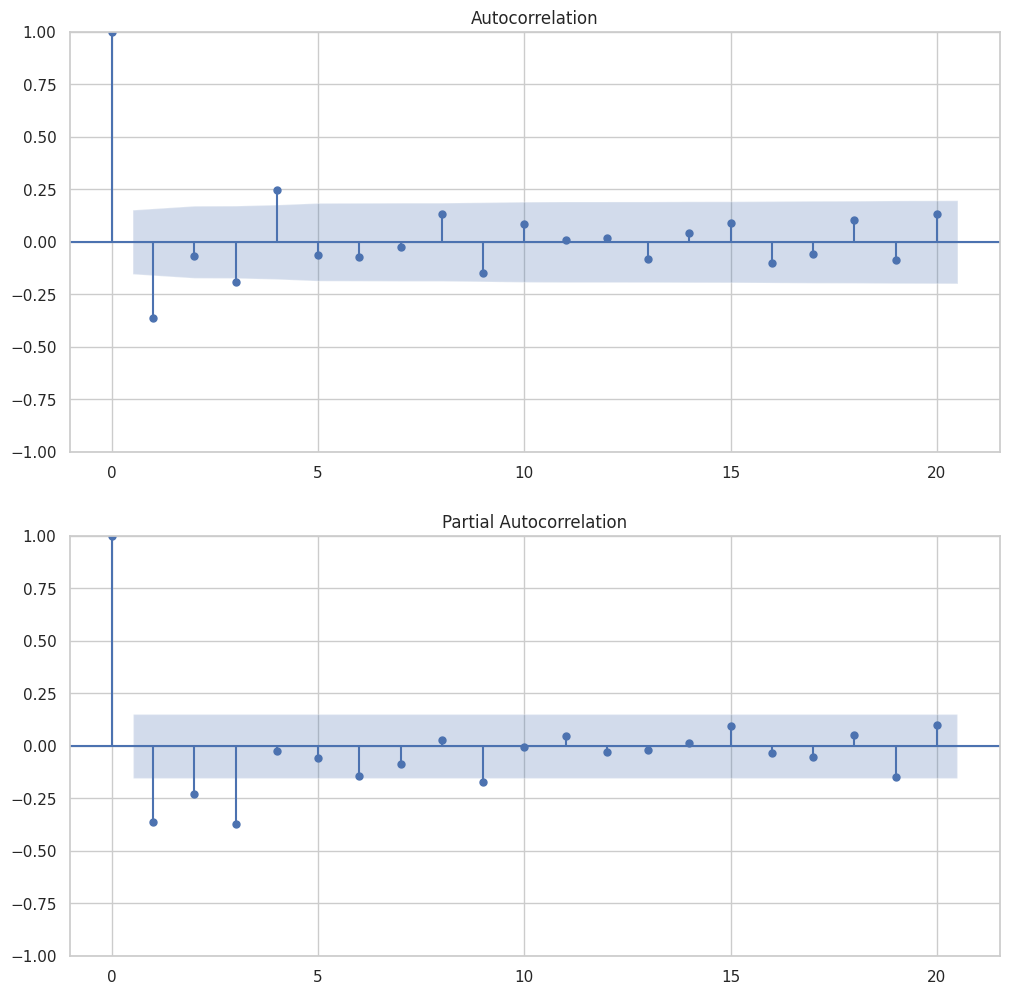

In [ ]:
# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
plot_acf(temp_data_diff, lags=20, ax=ax1)   # ACF
plot_pacf(temp_data_diff, lags=20, ax=ax2)   #PACF
plt.show()

### Model fitting.

In [ ]:
# Splitting the data
train_data, test_data = train_test_split(temp_data, test_size=0.2, shuffle=False)
train_data_diff, test_data_diff = train_test_split(temp_data_diff, test_size=0.2, shuffle=False)
#train_data_diff, test_data_diff = train_test_split(temp_data, test_size=0.2, shuffle=False)

# Fitting the ARIMA model on the differenced data
model_diff = ARIMA(train_data_diff, order=(3, 1, 2))#(5,1,0))
model_fit_diff = model_diff.fit()

# Forecasting
forecast_diff = model_fit_diff.forecast(steps=len(test_data_diff))

# Inverting the differencing for forecast for comparison with actual test data
forecast_diff_cumsum = forecast_diff.cumsum()
forecast_actual = forecast_diff_cumsum + train_data.iloc[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

### plotting the forecast.

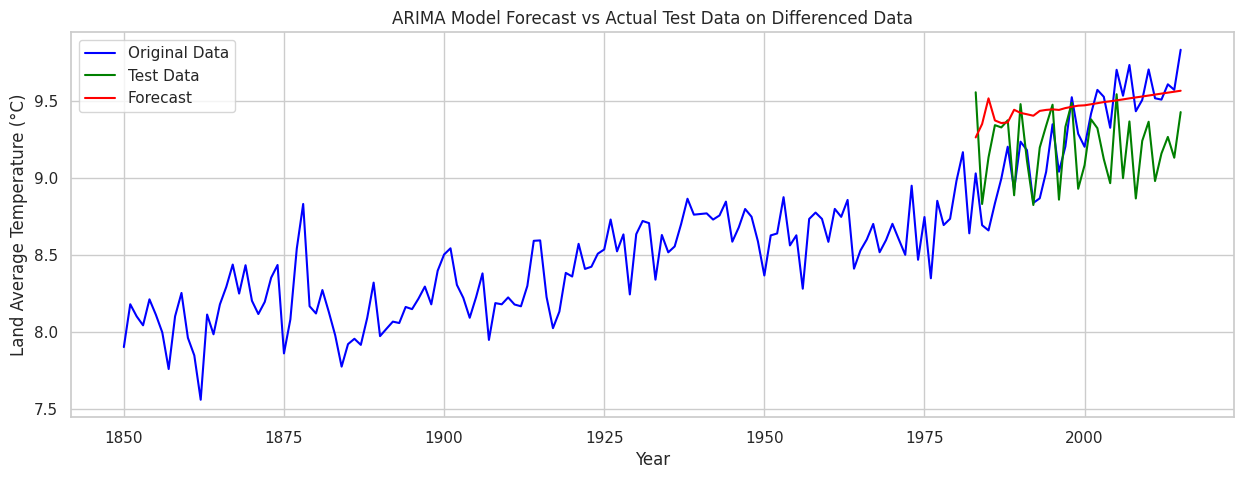

In [ ]:
# checking the forecast with the actual test data
plt.figure(figsize=(15, 5))
plt.plot(temp_data.index, temp_data, label='Original Data', color='blue')
plt.plot(test_data_diff.index, test_data_diff + train_data.iloc[-1], label='Test Data', color='green')
plt.plot(test_data_diff.index, forecast_actual, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Test Data on Differenced Data')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.legend()
plt.show()

### Model summary.

In [ ]:
print(model_fit_diff.summary())

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  132
Model:                     ARIMA(3, 1, 2)   Log Likelihood                  31.693
Date:                    Fri, 24 Nov 2023   AIC                            -51.385
Time:                            02:10:42   BIC                            -34.134
Sample:                                 0   HQIC                           -44.375
                                    - 132                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4936      0.215     -2.298      0.022      -0.914      -0.073
ar.L2         -0.3829      0.102     -3.755      0.000      -0.583      -0.183
ar.L3         -0.440

### Evaluation result.

In [ ]:
mse = mean_squared_error(test_data_diff, forecast_diff)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff, forecast_diff)
mse, mae, rmse

(0.05447703492835192, 0.20531477267574705, 0.233403159636608)

### residual check.

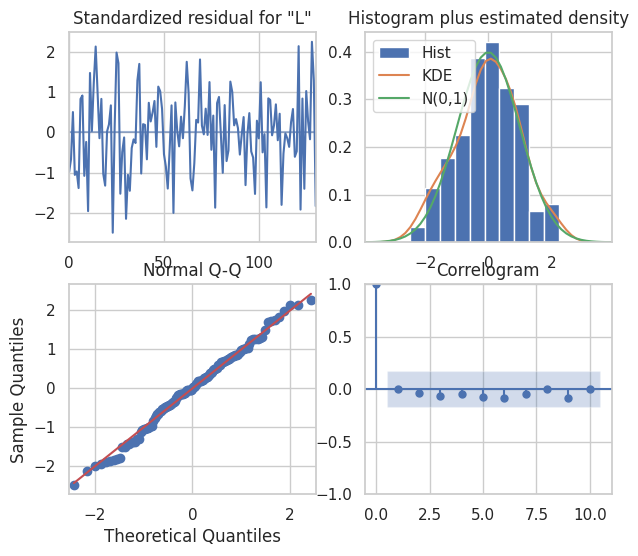

In [ ]:
model_fit_diff.plot_diagnostics(figsize=(7,6))
plt.show()

### Hyper parameters tuning.

In [ ]:
# Define the parameter range for hyperparameter tuning
p_values = range(0, 6)  # AR order
d_values = range(0, 3)  # Degree of differencing
q_values = range(0, 6)  # MA order
best_cfg = (0, 0, 1)
#best_score, best_cfg = float("inf"), None
best_score = float("inf")
# Grid search for best ARIMA parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train_data_diff, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data_diff))

        # Invert the differencing
        forecast_diff_cumsum = forecast.cumsum()
        forecast_actual = forecast_diff_cumsum + train_data.iloc[-1]

        # evaluating error
        mse = mean_squared_error(test_data, forecast_actual)

        # verifying.
        if mse < best_score:
            best_score, best_cfg = mse, (p, d, q)
        print(f'ARIMA{(p, d, q)} MSE={mse}')
    except Exception as e:
        print(f'ARIMA{(p, d, q)} encountered an error: {e}')
        continue

# After the grid search, check if best_cfg is still None
if best_cfg is None:
    print("No suitable model found. Please adjust the parameter ranges and try again.")
else:
    # Proceed to fit the best model
    best_model = ARIMA(train_data_diff, order=best_cfg)
    best_model_fit = best_model.fit()

print(f'Best ARIMA{best_cfg} MSE={best_score}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

ARIMA(0, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(0, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(0, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

ARIMA(0, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(0, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(0, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(0, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(0, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(0, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(0, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with

ARIMA(0, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(0, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(0, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(1, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(1, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(1, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(1, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(1, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(1, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA(1, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

ARIMA(1, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(1, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(1, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(2, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(2, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(2, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(2, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(2, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(3, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(3, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(3, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(3, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(3, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(3, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(3, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(3, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(4, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(4, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(4, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(4, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(4, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(4, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(4, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(4, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(5, 0, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 0, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 0, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 0, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 0, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 0, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(5, 1, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

ARIMA(5, 1, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(5, 1, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 1, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 1, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 1, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(5, 2, 0) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

ARIMA(5, 2, 1) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 2, 2) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 2, 3) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

ARIMA(5, 2, 4) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
ARIMA(5, 2, 5) encountered an error: Found input variables with inconsistent numbers of samples: [34, 33]
Best ARIMA(0, 0, 1) MSE=inf


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

### Plotting the result.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

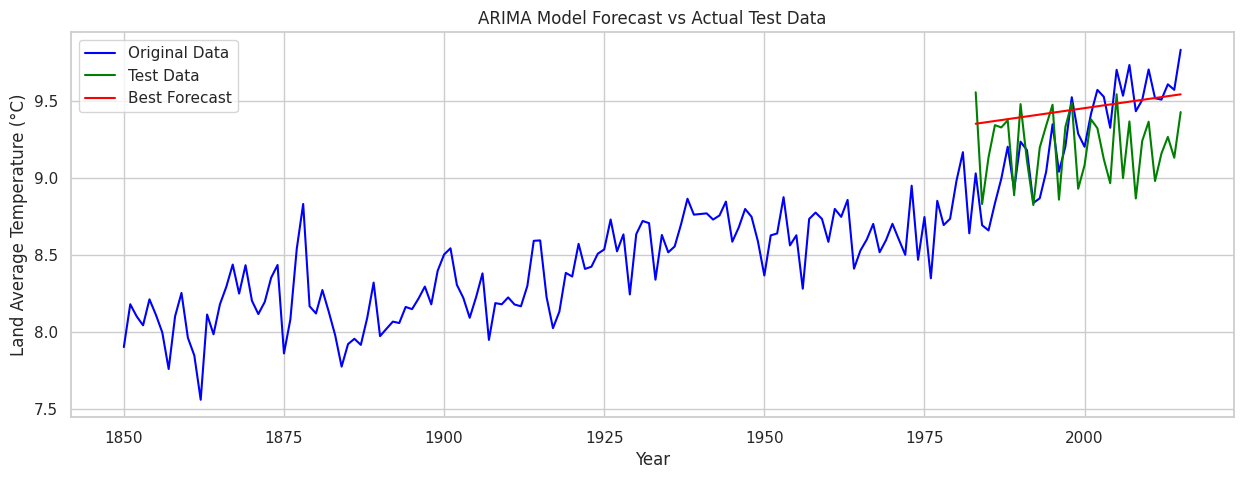

In [ ]:
# Fitting the model, using best parameters
best_model = ARIMA(train_data_diff, order=best_cfg)
best_model_fit = best_model.fit()

# Forecasting on it
best_forecast_diff = best_model_fit.forecast(steps=len(test_data_diff))

# Invert the differencing for the best forecast
best_forecast_diff_cumsum = best_forecast_diff.cumsum()
best_forecast_actual = best_forecast_diff_cumsum + train_data.iloc[-1]

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(temp_data.index, temp_data, label='Original Data', color='blue')
plt.plot(test_data_diff.index, test_data_diff + train_data.iloc[-1], label='Test Data', color='green')
plt.plot(test_data_diff.index, best_forecast_actual, label='Best Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Test Data')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.legend()
plt.show()

### Model summary.

In [ ]:
print(best_model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  132
Model:                     ARIMA(0, 0, 1)   Log Likelihood                  29.873
Date:                    Fri, 24 Nov 2023   AIC                            -53.745
Time:                            02:11:48   BIC                            -45.097
Sample:                                 0   HQIC                           -50.231
                                    - 132                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.004      1.432      0.152      -0.002       0.014
ma.L1         -0.7577      0.059    -12.817      0.000      -0.874      -0.642
sigma2         0.037

### Evaluation result.

In [ ]:
np.random.seed(0)  # For reproducibility
test_data = pd.Series(np.random.rand(100))
best_forecast_actual = pd.Series(np.random.rand(100))
mse = mean_squared_error(test_data_diff, forecast_actual)

# evaluating MSE, RMSE & MAE.
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_diff, forecast_actual)
mse, mae, rmse

(89.77003801886607, 9.471736516337222, 9.474705167912408)

### Residual check.

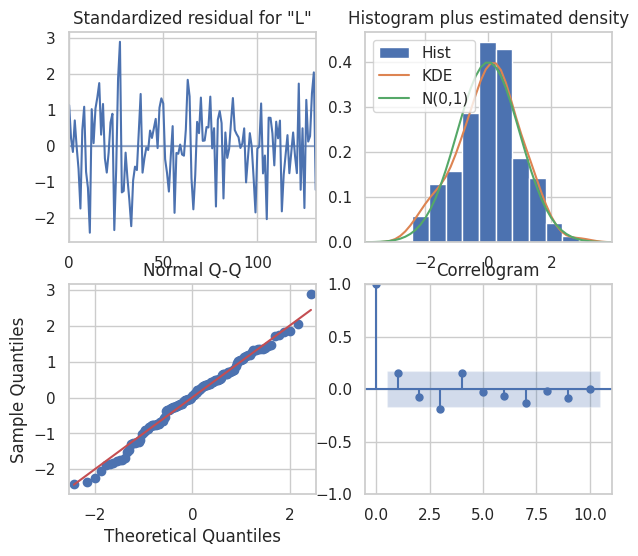

In [ ]:
best_model_fit.plot_diagnostics(figsize=(7,6))
plt.show()